# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Your code goes here
marketing = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis_clean.csv')
marketing.tail(30)

mkt = marketing[marketing['total_claim_amount']>1000][marketing['response'] == 'Yes'].drop(columns='unnamed:_0').reset_index(drop=True)
display(mkt)

C:\Users\joaco\AppData\Local\Temp\ipykernel_13324\3052256401.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mkt = marketing[marketing['total_claim_amount']>1000][marketing['response'] == 'Yes'].drop(columns='unnamed:_0').reset_index(drop=True)


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,OK31456,California,11009.130490,Yes,Premium,Bachelor,2011-01-24,Employed,F,51643,...,1,Corporate Auto,Corporate L3,Offer2,Agent,1358.400000,Luxury Car,Medsize,A,1
1,YJ16163,Oregon,11009.130490,Yes,Premium,Bachelor,2011-01-24,Employed,F,51643,...,1,Special Auto,Special L3,Offer2,Agent,1358.400000,Luxury Car,Medsize,A,1
2,GW43195,Oregon,25807.063000,Yes,Extended,College,2011-02-13,Employed,F,71210,...,2,Personal Auto,Personal L2,Offer1,Branch,1027.200000,Luxury Car,Small,A,2
3,IP94270,Arizona,13736.132500,Yes,Premium,Master,2011-02-13,Disabled,F,16181,...,8,Personal Auto,Personal L2,Offer1,Web,1261.319869,SUV,Medsize,A,2
4,FJ28407,California,5619.689084,Yes,Premium,High School or Below,2011-01-26,Unemployed,M,0,...,1,Personal Auto,Personal L1,Offer2,Web,1027.000029,SUV,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,FN44127,Oregon,3508.569533,Yes,Extended,College,2011-01-05,Medical Leave,M,20978,...,1,Personal Auto,Personal L2,Offer2,Branch,1176.278800,Four-Door Car,Small,A,1
63,XZ64172,Oregon,10963.957230,Yes,Premium,High School or Below,2011-02-08,Employed,M,55687,...,1,Corporate Auto,Corporate L2,Offer1,Agent,1324.800000,Luxury SUV,Medsize,A,2
64,IX60941,Oregon,3508.569533,Yes,Extended,College,2011-01-05,Medical Leave,M,20978,...,1,Personal Auto,Personal L3,Offer2,Branch,1176.278800,Four-Door Car,Small,A,1
65,QO62792,Oregon,7840.165778,Yes,Extended,College,2011-01-14,Employed,M,58414,...,1,Personal Auto,Personal L3,Offer2,Agent,1008.000000,Four-Door Car,Medsize,A,1


2. Using the original Dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

In [3]:
mkt2 = marketing[marketing['response'] == 'Yes'].groupby(['policy_type','gender']).agg({'total_claim_amount':['mean']})
display(mkt2)

#The average claim amount is pretty similar between the different policy types and across genders

total_claim_amount
                                    mean
policy_type    gender                   
Corporate Auto F              433.738499
               M              408.582459
Personal Auto  F              452.965929
               M              457.010178
Special Auto   F              453.280164
               M              429.527942

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

In [4]:
mkt3 = marketing[marketing['number_of_policies']>=1].groupby(['state']).agg(count=('customer','nunique'))
mkt31 = mkt3[mkt3['count'] > 500 ]

display(mkt31)


,count
state,
Arizona,1703
California,3520
Nevada,882
Oregon,2601
Washington,798


4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

In [5]:
mkt4 = np.round(marketing.groupby(['education','gender']).agg({'customer_lifetime_value':['min','max','median']}),2)

display(mkt4)


customer_lifetime_value                   
                                                min       max   median
education            gender                                           
Bachelor             F                      1904.00  73225.96  5640.51
                     M                      1898.01  67907.27  5548.03
College              F                      1898.68  61850.19  5623.61
                     M                      1918.12  61134.68  6005.85
Doctor               F                      2395.57  44856.11  5332.46
                     M                      2267.60  32677.34  5577.67
High School or Below F                      2144.92  55277.45  6039.55
                     M                      1940.98  83325.38  6286.73
Master               F                      2417.78  51016.07  5729.86
                     M                      2272.31  50568.26  5579.10

## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

# Lab | Customer Analysis Round 3

For this lab, we still keep using the `marketing_customer_analysis.csv` file. You can find the file in the `files_for_lab` folder.

### Get the data

- Use the same jupyter file from the last lab, `Customer Analysis Round 3`

### EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:

- Show DataFrame info.
- Describe DataFrame.
- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.

In [16]:
#lab customer analysis round 3
display(marketing)

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [15]:
marketing.describe()
#There are columns that are describes such as month, that doesnt make sense, should be filtered.
#columns = ['customer_lifetime_value','income'...]

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330,1.466728
std,3149.590053,6885.081434,30359.195670,34.442532,9.783520,27.940675,0.885589,2.399359,292.180556,0.498915
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,2727.250000,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5454.500000,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630,1.000000
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.384256,4.000000,547.200000,2.000000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


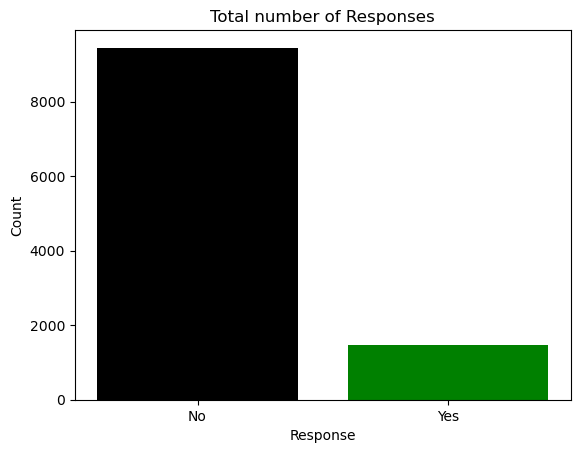

In [22]:
fig, ax = plt.subplots()
ax.bar(x = marketing['response'].value_counts().index, height = marketing['response'].value_counts().values, color = ['black', 'green'])
ax.set_xlabel("Response")
ax.set_ylabel("Count")
ax.set_title("Total number of Responses")
plt.show()

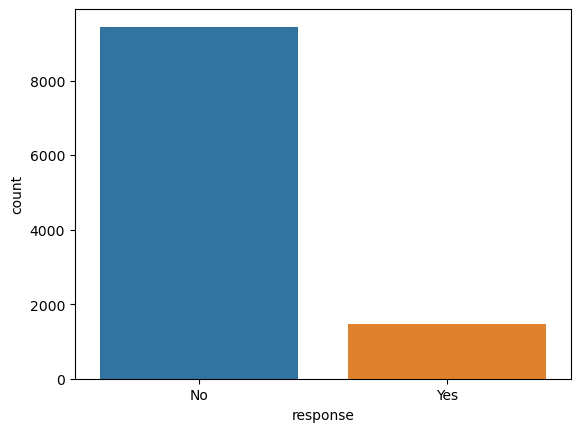

In [24]:
fig, ax = plt.subplots()
sns.countplot(data=marketing, x="response", ax = ax)
plt.show()

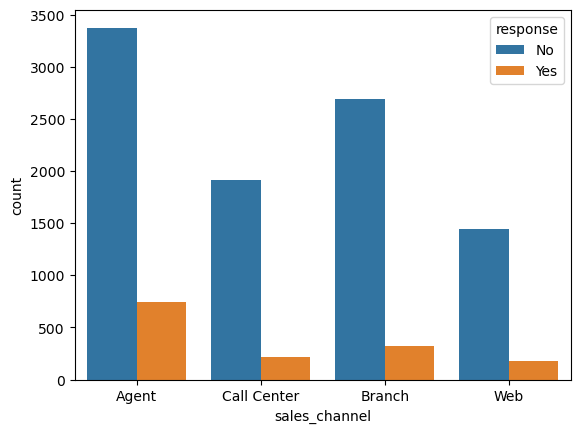

In [7]:
# By sales channel

fig, ax = plt.subplots()

sns.countplot(data=marketing, x='sales_channel', hue='response')

plt.show()

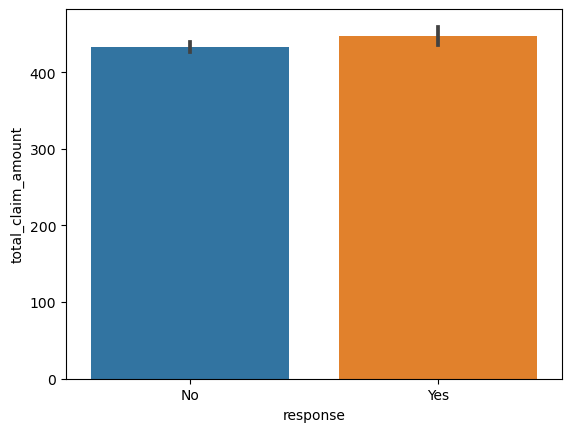

In [8]:
#By Total Claim Amount

fig, ax = plt.subplots()

sns.barplot(data=marketing, x='response', y='total_claim_amount')

plt.show()

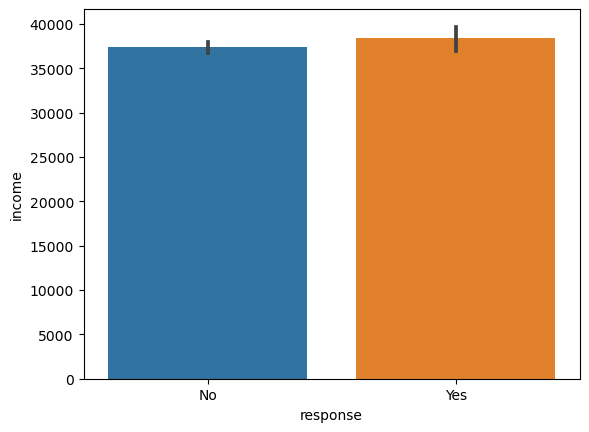

In [10]:
# By Income

fig, ax = plt.subplots()

sns.barplot(data=marketing, x='response', y='income')

plt.show()